Importing all libraries including the ones for calculating Metrics

In [40]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import pairwise_distances



Installing and importing validclust library for calculating Dunn's index

In [41]:
!pip install validclust
from validclust import dunn

Importing CIFAR-10 Dataset

In [42]:

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
np.random.seed(25)

Visualising the shapes of the Training and Testing Data

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [44]:
print(y_test[:5])

[[3]
 [8]
 [8]
 [0]
 [6]]


Using the X_TEST dataset for training

In [45]:
x_test[0].shape

(32, 32, 3)

Each image is of size 32x32x3. For K-Means clustering we need to convert the 3D images to 1D images. So, each image is converted into 3072x1 from 32x32x3. So, from a 10000x32x32x3 matrix, we get a matrix of shape 10000x3072.

In [46]:
data = x_test.reshape(len(x_test), -1)
print(data.shape)
print(data[0])

(10000, 3072)
[158 112  49 ...  21  67 110]


Normalizing the data

In [47]:
data = data/255
print(data[0])

[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]


Initializing 10 random indices from the dataset from which initial Centroids will be assigned.

In [48]:
random_indices = []
for i in range(10):
  random_indices.append(np.random.randint(len(data)))
#random_indices = np.array(random_indices)
#print(random_indices.shape)

Assigning the Initial Centroids from the Training data.

In [49]:
centroids = []
for i in random_indices:
  centroids.append(data[i])
centroids = np.array(centroids)
print(centroids)
print(centroids.shape)

[[0.51764706 0.46666667 0.58431373 ... 0.58823529 0.42352941 0.36470588]
 [0.45098039 0.65098039 0.79607843 ... 0.4745098  0.6627451  0.80784314]
 [0.92941176 0.92156863 0.96862745 ... 0.93333333 0.92156863 0.95686275]
 ...
 [0.21960784 0.53333333 0.76862745 ... 0.49803922 0.52156863 0.57647059]
 [0.81960784 0.84705882 0.85882353 ... 0.58431373 0.58823529 0.59215686]
 [0.69411765 0.83137255 0.91372549 ... 0.12941176 0.21960784 0.05882353]]
(10, 3072)


Steps for K-Means clustering:

1.   We are iterating 50 times to ensure that better clusters are formed 
2.   In each iteration, we are first iterating over the entire dataset and calculating the Euclidian Distance of the data point from each of the centroids using "np.linalg.norm". Then, we are finding out the centroid for which the distance is minimum and assigning the data point to the cluster corresponding to that centroid.

1.   Next step is to calculate the new centroids. For this we are iterating over the list of clusters and for each of the clusters, we are finding out the data-points belonging to that cluster. Then for each cluster we calculate the new centroid and append it to the centroids_updated matrix.












In [50]:
iterations = 50
centroids_updated = centroids
for k in range(iterations):
  clusters = np.zeros(len(data))
  #centroids_updated = np.zeros(10)

  for i in range(len(data)):
    euclidian_distance = np.zeros(10)
    for j in range(10):
      euclidian_distance[j] = np.linalg.norm(data[i] - centroids_updated[j])
    clusters[i] = np.argmin(euclidian_distance)
  
  for i in range(10):
    cluster_checker = []
    for j in range(len(data)):
      if clusters[j] == (i*1.0):
        cluster_checker.append(data[j])
    cluster_checker = np.array(cluster_checker)
    centroids_updated[i] = np.mean(cluster_checker, axis = 0)
    
    if(k==49):
      print(cluster_checker.shape)


#    print(cluster_checker.shape)
#print(cluster_checker)
print(centroids_updated)
print(centroids_updated.shape)

#print(euclidian_distance)

(789, 3072)
(636, 3072)
(650, 3072)
(1573, 3072)
(1037, 3072)
(1332, 3072)
(976, 3072)
(865, 3072)
(1269, 3072)
(873, 3072)
[[0.27505157 0.2817913  0.24822684 ... 0.60941375 0.59366286 0.53612664]
 [0.81769639 0.84461093 0.86614872 ... 0.8003268  0.81302257 0.81476138]
 [0.82029563 0.836      0.83534842 ... 0.78602715 0.77748416 0.75011161]
 ...
 [0.29689221 0.31684008 0.31046583 ... 0.35605123 0.3566542  0.33764933]
 [0.52024599 0.55357777 0.55578733 ... 0.58967228 0.59406975 0.5695669 ]
 [0.71805584 0.76955282 0.81910473 ... 0.45694585 0.47746558 0.47017047]]
(10, 3072)


In this step, we are visualising the data using Matplotlib.

We use the first two pixels of each data point and centroids to visualise the data, as we cannot plot 3072 pixels on a 2D plane.

In the figure the data-points are represented using dots and the centroids are represented using circles with the cluster label indicated over them

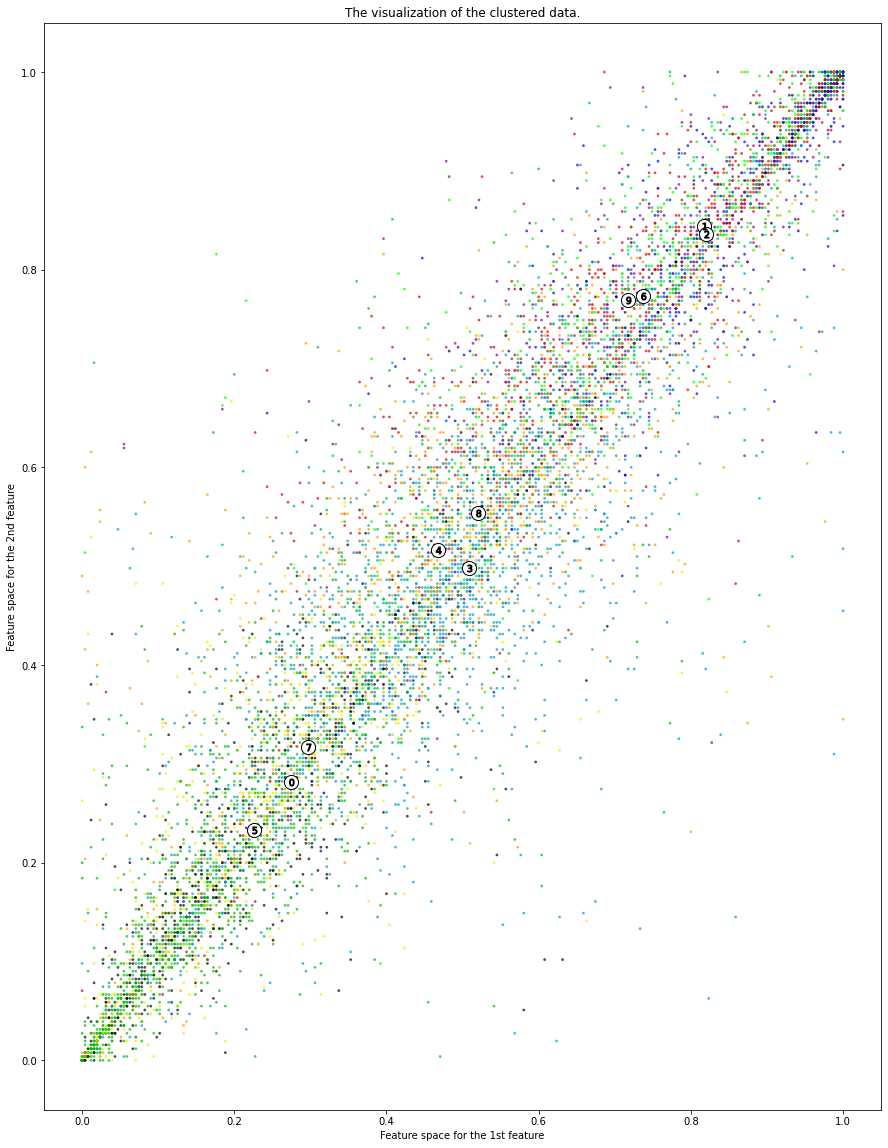

In [51]:
fig_1,ax_1 = plt.subplots(1,1)
fig_1.set_size_inches(15, 20)
colors = cm.nipy_spectral(clusters.astype(float) / 10)
ax_1.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = centroids_updated
# Draw white circles at cluster centers
ax_1.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax_1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax_1.set_title("The visualization of the clustered data.")
ax_1.set_xlabel("Feature space for the 1st feature")
ax_1.set_ylabel("Feature space for the 2nd feature")

plt.show()

Calculating Average Silhoutte Score and Silhoutte values for all data-points.

In [52]:
silhouette_avg = silhouette_score(data, clusters)
sample_silhouette_values = silhouette_samples(data, clusters)


The Average Silhoutte Co-efficient was evaluated to be 0.0577 approximately.

In [53]:
print(silhouette_avg)
print(sample_silhouette_values[:5])
print(np.min(sample_silhouette_values))
print(np.max(sample_silhouette_values))
print(sample_silhouette_values.shape)

0.05730643895486339
[ 0.06569241  0.14081596 -0.00983808  0.16065826  0.00624999]
-0.10881212488655617
0.3132831847842909
(10000,)


Visualising the Silhoutte Coefficients for the entire Sample Set.

The Silhoutte coefficients range from -0.1 to 0.4 and the figure shows the distribution of Silhoutte Co-efficients for each cluster over the entire training dataset.

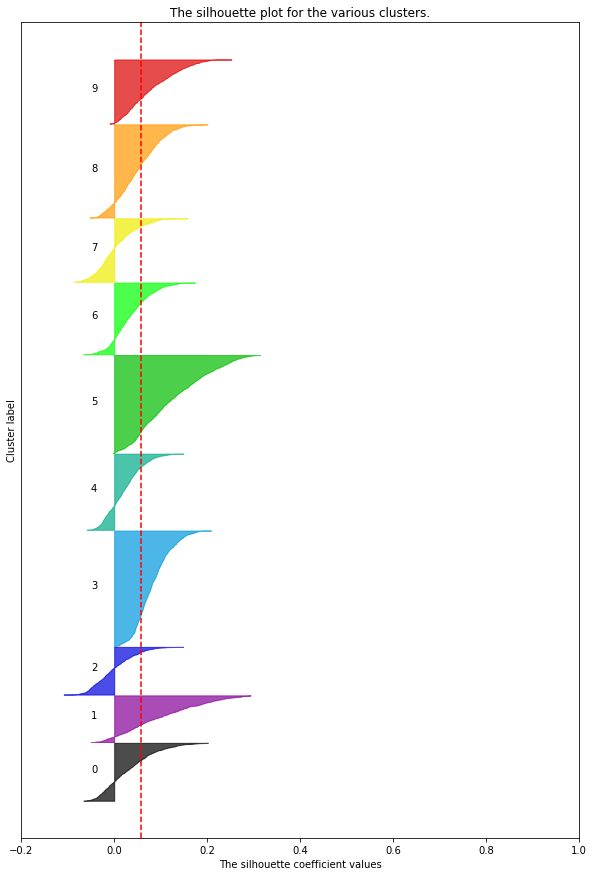

In [54]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10, 15)
y_lower = 10
for i in range(10):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    #ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values = []
    for j in range(len(sample_silhouette_values)):
      if(clusters[j] == i):
        ith_cluster_silhouette_values.append(sample_silhouette_values[j])
    ith_cluster_silhouette_values = np.array(ith_cluster_silhouette_values)
    ith_cluster_silhouette_values.sort()
    

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


Calculating Dunn's Index for the clustering. The Dunn's index was found to be 0.115 approximately.

In [55]:
distances = pairwise_distances(data)
dunns_index = dunn(distances, clusters)
print(dunns_index)

0.11444629405015164


In [26]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import pairwise_distances
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras import Model

import tensorflow as tf


In [27]:
!pip install validclust
from validclust import dunn

In [18]:

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
np.random.seed(25)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [20]:
print(y_test[:5])
print(x_test[0].shape)

[[3]
 [8]
 [8]
 [0]
 [6]]
(32, 32, 3)


In [21]:
data = x_train.reshape(len(x_train), -1)
print(data.shape)
print(data[0])

(50000, 3072)
[ 59  62  63 ... 123  92  72]


In [22]:
data = data/255
print(data[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


Designing Auto-Encoder Model. Layer - 1 to Layer - 4 is the Encoder and from Layer - 5 starts the Decoder.

In [27]:


# model.add(Dense(1000, input_dim=8, init='uniform', activation='relu'))
input_layer = Input(shape = (3072,))
layer1 = (Dense(3072, activation='relu'))(input_layer)
layer2 = (Dense(1024, activation='relu'))(layer1)
layer3 = (Dense(512, activation='relu'))(layer2)
layer4 = (Dense(128, activation='relu'))(layer3)

layer5 = (Dense(512, activation='relu'))(layer4)
layer6 = (Dense(1024, activation='relu'))(layer5)
layer7 = (Dense(3072, activation='linear'))(layer6)

model  = Model(input_layer, layer7)

# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(3072, activation='linear'))
model.compile(optimizer=SGD(learning_rate= 0.1), loss='mean_squared_error', metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312

In [28]:
history = model.fit(data, data, epochs=10, batch_size=64, verbose = 1)


Epoch 1/10
782/782 [==============================] - 35s 45ms/step - loss: 0.0796 - accuracy: 4.0000e-04
Epoch 2/10
782/782 [==============================] - 35s 44ms/step - loss: 0.0452 - accuracy: 0.0013
Epoch 3/10
782/782 [==============================] - 34s 44ms/step - loss: 0.0435 - accuracy: 0.0072
Epoch 4/10
782/782 [==============================] - 34s 44ms/step - loss: 0.0404 - accuracy: 0.0053
Epoch 5/10
782/782 [==============================] - 36s 45ms/step - loss: 0.0375 - accuracy: 0.0024
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 0.0355 - accuracy: 0.0013
Epoch 7/10
782/782 [==============================] - 34s 43ms/step - loss: 0.0340 - accuracy: 0.0011
Epoch 8/10
782/782 [==============================] - 34s 44ms/step - loss: 0.0329 - accuracy: 0.0015
Epoch 9/10
782/782 [==============================] - 34s 44ms/step - loss: 0.0320 - accuracy: 0.0017
Epoch 10/10
782/782 [==============================] - 34s 44ms/step - loss: 0

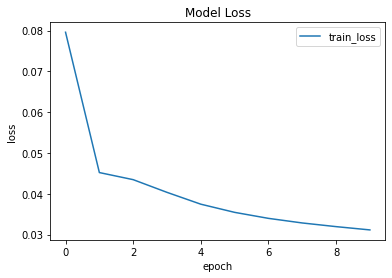

In [29]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

Extracting the Encoder output which will be used for clustering

In [30]:
encoder = Model(input_layer, layer4)
predicted_img = encoder.predict(data)

Performing K-Means Clustering using Sklearn Library

In [31]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=10, init='random', max_iter=1000, random_state=5)
predicted_clusters = km_model.fit_predict(predicted_img)

In [32]:
print(km_model.cluster_centers_[:, 0])

[2.9103830e-11 2.9103830e-11 4.7466345e-04 7.0240843e-05 8.8902307e-06
 3.7467061e-04 8.7414926e-04 1.5883925e-04 1.0241298e-03 2.9103830e-11]


The Scatter Plot we get this time is much better compared to the previous plot even though the dataset is 5 times larger.

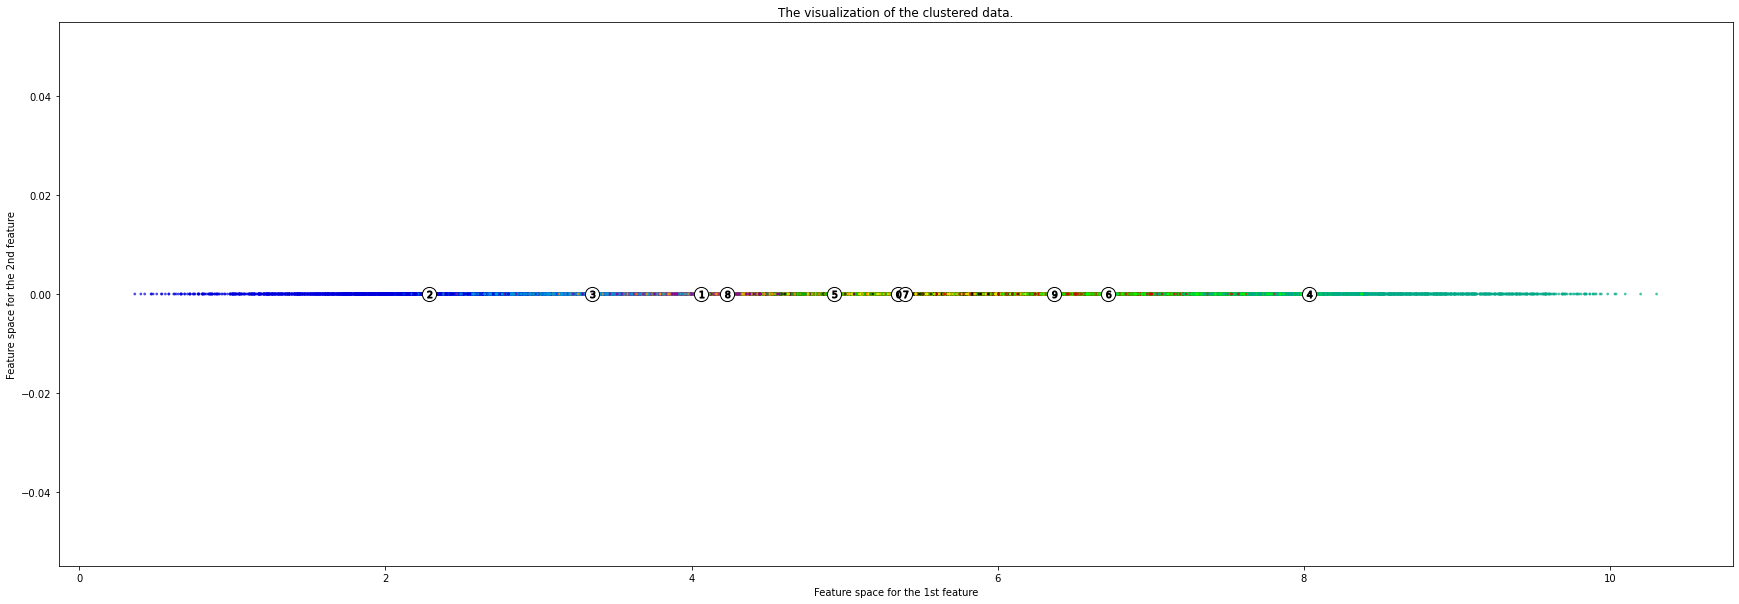

In [39]:
fig_1,ax_1 = plt.subplots(1,1)
fig_1.set_size_inches(30, 10)
colors = cm.nipy_spectral(predicted_clusters.astype(float)/10)
ax_1.scatter(predicted_img[:, 1], predicted_img[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = km_model.cluster_centers_
# Draw white circles at cluster centers
ax_1.scatter(centers[:, 1], centers[:, 2], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax_1.scatter(c[1], c[2], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax_1.set_title("The visualization of the clustered data.")
ax_1.set_xlabel("Feature space for the 1st feature")
ax_1.set_ylabel("Feature space for the 2nd feature")

plt.show()

In [34]:
silhouette_avg = silhouette_score(predicted_img, predicted_clusters)
sample_silhouette_values = silhouette_samples(predicted_img, predicted_clusters)


We get a Silhouette Average of 0.181, which indicates that the clustering this time is much better

In [35]:
print(silhouette_avg)
print(sample_silhouette_values[:5])
print(np.min(sample_silhouette_values))
print(np.max(sample_silhouette_values))
print(sample_silhouette_values.shape)

0.18189962
[0.04918659 0.11358586 0.15833089 0.14413223 0.16084014]
-0.059352327
0.52100915
(50000,)


In [36]:
distances = pairwise_distances(predicted_img)
dunns_index = dunn(distances, predicted_clusters)
print(dunns_index)

0.033547923
